## Descriptives Notebook

*currently in-process*

In [293]:
# Data Manipulation
# ======================================================
import pandas as pd 
import numpy as np
from epiweeks import Week
from datetime import datetime
from calendar import month_name, month_abbr
from os import path
import configparser

# Reading Secrets
# ======================================================
cfg = configparser.ConfigParser()
cfg.read('secrets.ini')
ROOT_PATH = path.abspath(cfg.get('default','root'))
DATA_PATH = path.join(ROOT_PATH, 'src/data')

# Warnings Config
# ======================================================
import warnings
warnings.filterwarnings('ignore')

# Statistics
# ======================================================
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

# Plotting
# ======================================================
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
# Loading & Manipulating Dataset

df = pd.read_csv(path.join(DATA_PATH, 'raw_dataset.csv'))
df['epiweek'] = df['epiweek'].map(lambda x: Week.fromstring(str(x)))
df['weekstart'] = pd.to_datetime(df['epiweek'].map(lambda x: Week.startdate(x)))
df.set_index('weekstart', inplace=True)
df['epiweek'] = df['epiweek'].map(lambda x: int(str(x)[4:]))

In [14]:
means = df[['cases','visits','GS_cold', 'GS_cough', 'GS_fever', 'GS_flu', 
'AWND', 'PRCP', 'SNOW', 'TAVG','TMAX', 'TMIN', 
'Overall AQI Value',
'CO', 'Ozone', 'PM10', 'PM25', 'Days Good',
'Days Moderate', 'Days Unhealthy']]\
    .groupby(df.index.month).mean()

means.index.name = 'month'

In [15]:
means

,cases,visits,GS_cold,GS_cough,GS_fever,GS_flu,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,Overall AQI Value,CO,Ozone,PM10,PM25,Days Good,Days Moderate,Days Unhealthy
month,,,,,,,,,,,,,,,,,,,,
1,1571.309859,12.384615,3336.436620,676.704225,1186.774648,1244.619718,10.148893,0.046278,0.796781,23.469388,30.891348,18.072435,42.408451,4.761194,25.367347,10.800000,43.112676,4.943662,1.971831,0.070423
2,1709.156250,14.067797,3115.703125,671.062500,1260.046875,1134.000000,10.270089,0.064732,0.674107,26.004464,33.053571,18.767857,42.890625,4.766667,31.363636,9.365079,42.156250,4.953125,1.968750,0.015625
3,1628.183099,16.149254,2830.183099,605.661972,1230.253521,782.549296,10.065996,0.040241,0.128773,34.660232,46.082495,27.557344,43.873239,4.462687,38.301887,12.414286,41.225352,5.352113,1.549296,0.070423
4,835.405797,12.253968,2745.623188,531.391304,1179.231884,1112.101449,10.668737,0.122153,0.068323,48.541353,59.606625,38.968944,46.782609,3.641791,45.246377,13.358209,32.753623,5.420290,1.492754,0.086957
5,805.500000,8.968254,2665.842857,485.628571,1126.800000,765.000000,8.802041,0.067347,0.000000,60.527473,71.175510,49.691837,51.157143,3.571429,49.685714,16.362319,36.157143,4.685714,2.014286,0.300000
6,135.478261,7.067797,2474.681159,459.159420,1130.855072,527.014493,8.084886,0.111801,0.000000,69.725000,79.778468,59.254658,54.753623,3.826087,52.101449,18.850746,40.347826,4.304348,2.159420,0.536232
7,4.597222,4.616667,2494.375000,445.722222,1096.180556,582.166667,7.386905,0.091270,0.000000,73.167857,84.255952,63.365079,55.513889,3.930556,52.777778,18.157143,44.736111,4.041667,2.500000,0.458333
8,32.594203,4.754386,2473.072464,455.521739,1087.130435,631.666667,7.076605,0.105590,0.000000,70.626050,80.828157,60.770186,46.333333,4.594203,42.463768,18.652174,41.826087,4.695652,2.173913,0.130435
9,755.342857,8.446154,2701.942857,558.828571,1142.214286,932.528571,7.753061,0.106122,0.000000,64.202381,73.536735,53.418367,39.542857,4.500000,37.000000,18.805970,36.628571,5.514286,1.342857,0.142857


In [43]:
means.style \
    .format(precision=1) \
    .relabel_index([month_abbr[i] for i in range(1,13)]) \
    .relabel_index(['cases','EDvisits',"'cold' searches","'cough' searches","'fever' searches","'flu' searches",'wind','precip','snow','avg temp','max temp','min temp','AQI','CO','Ozone','PM10','PM2.5','Days Good','Days Moderate','Days Unhealthy'], axis=1) \
    .set_caption('Variable Means') \
    .bar(align='mid', color='cadetblue') \
    .to_html('test.html')

In [194]:
m = means.T

In [195]:
m = m.T.rename(columns={'visits':'EDvisits',
                        'GS_cold':"'cold'",
                        'GS_cough':"'cough'",
                        'GS_fever':"'fever'",
                        'GS_flu':"'flu'",
                        'AWND':'wind',
                        'PRCP':'precip',
                        'SNOW':'snow',
                        'TAVG':'avg temp',
                        'TMAX':'max temp',
                        'TMIN':'min temp',
                        'Overall AQI Value':'AQI',
                        'PM25':'PM2.5'})

In [196]:
m = m.T

In [197]:
m[' '] = ('Surveillance','Surveillance',
        'Google Trends','Google Trends','Google Trends','Google Trends',
        'Weather','Weather','Weather','Weather','Weather','Weather',
        'Air Quality','Air Quality','Air Quality','Air Quality','Air Quality','Air Quality','Air Quality','Air Quality')

In [198]:
m = m.reset_index().rename(columns={'index':''}).set_index([' ','']).T

In [199]:
m \
    .style \
    .format(precision=1) \
    .relabel_index([month_abbr[i] for i in range(1,13)]) \
    .set_properties(**{'text-align':'center'}) \
    .set_table_styles([
        dict(selector='caption', props=[('font-size','26px'),('font-weight','500')]), 
        dict(selector='th', props=[('text-align','center'),('font-weight','500')]) ,
        dict(selector='', props=[('border','1px solid grey')])]) \
    .set_caption('Variable Means', ) \
    .bar(align='mid', color='cadetblue') \
    .to_html('test2.html')


In [200]:
m.index.names = ['']

In [201]:
m = m.T

In [202]:
m.index.names = ['','Month']

In [204]:
m.T \
    .style \
    .format(precision=1) \
    .relabel_index([month_abbr[i] for i in range(1,13)]) \
    .set_properties(**{'text-align':'center'}) \
    .set_table_styles([
        dict(selector='caption', props=[('font-size','26px'),('font-weight','500')]), 
        dict(selector='th', props=[('text-align','center'),('font-weight','500')]) ,
        dict(selector='', props=[('border','1px solid grey')])]) \
    .set_caption('Variable Means', ) \
    .bar(align='mid', color='cadetblue') \
    .to_html('test2.html')


In [257]:
df_std = df.rename(columns={'visits':'EDvisits',
                        'AWND':'wind',
                        'PRCP':'precip',
                        'SNOW':'snow',
                        'TAVG':'avg temp',
                        'TMAX':'max temp',
                        'TMIN':'min temp',
                        'Overall AQI Value':'AQI',
                        'PM25':'PM2.5'}).drop(columns=['epiweek','Days Good','Main Pollutant','cases'])

In [258]:
df_std[df_std.columns] = StandardScaler().fit_transform(df_std)

In [259]:
df_std = df_std.groupby(df_std.index.month).mean()

In [260]:
df_std.index.names = ['Month']


In [261]:
df_std.reset_index(inplace=True)
df_std['Month'] = df_std['Month'].apply(lambda x: month_abbr[x])
df_std.set_index('Month',inplace=True)

In [262]:
df_std = df_std.melt(ignore_index=False)

In [263]:
df_std

,variable,value
Month,,
Jan,GS_cold,0.835354
Feb,GS_cold,0.446741
Mar,GS_cold,-0.055933
Apr,GS_cold,-0.204805
May,GS_cold,-0.345263
...,...,...
Aug,EDvisits,-0.563593
Sep,EDvisits,-0.227748
Oct,EDvisits,0.078410


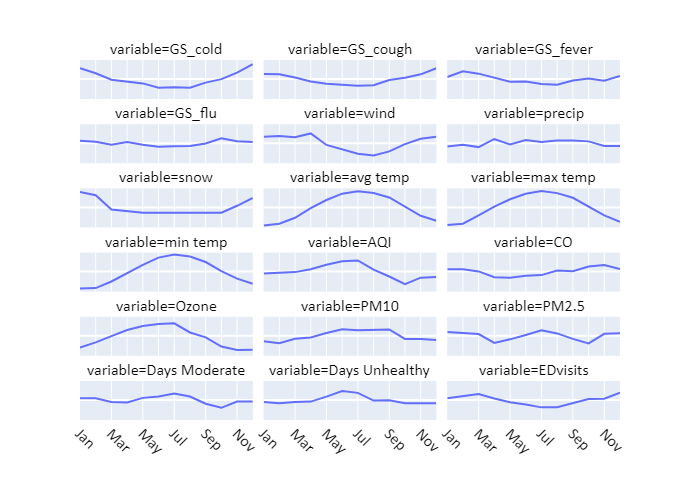

In [277]:
fig = px.line(df_std.reset_index(), x='Month', y='value', 
                facet_col='variable', facet_col_wrap=3)
fig.update_layout(font_color='black'
                ,font_family='Calibri'
                , font_size=16)
fig.update_xaxes(title='',tickangle=45)
fig.update_yaxes(title='',tickvals=['','',''])
fig.show('png')

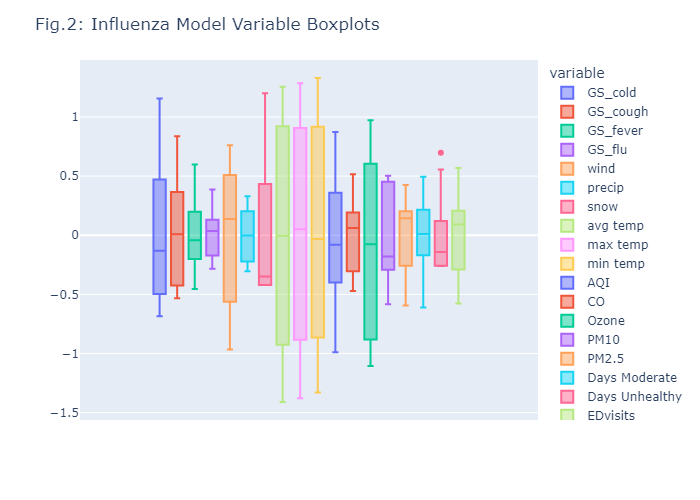

In [279]:
fig = px.box(df_std.reset_index(),y='value', color='variable')
fig.update_layout(title='Fig.2: Influenza Model Variable Boxplots')
fig.update_yaxes(title='',)
fig.show('png')

In [282]:
df_std = df.rename(columns={'visits':'EDvisits',
                        'AWND':'wind',
                        'PRCP':'precip',
                        'SNOW':'snow',
                        'TAVG':'avg temp',
                        'TMAX':'max temp',
                        'TMIN':'min temp',
                        'Overall AQI Value':'AQI',
                        'PM25':'PM2.5'}).drop(columns=['epiweek','Days Good','Main Pollutant','cases'])

df_std[df_std.columns] = StandardScaler().fit_transform(df_std)

In [286]:
df_std = df_std.melt(ignore_index=False)

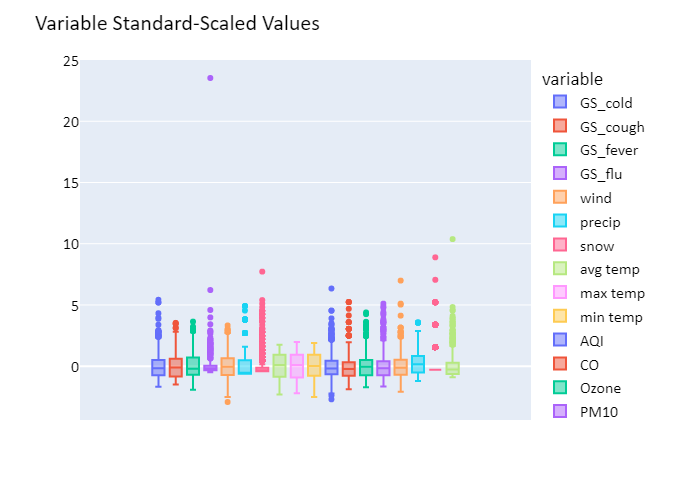

In [289]:
fig = px.box(df_std.reset_index(),y='value', color='variable')
fig.update_layout(title='Variable Standard-Scaled Values',font_color='black'
                ,font_family='Calibri'
                , font_size=16)
fig.update_yaxes(title='',)
fig.show('png')

In [291]:
df_std = df.rename(columns={'visits':'EDvisits',
                        'AWND':'wind',
                        'PRCP':'precip',
                        'SNOW':'snow',
                        'TAVG':'avg temp',
                        'TMAX':'max temp',
                        'TMIN':'min temp',
                        'Overall AQI Value':'AQI',
                        'PM25':'PM2.5'}).drop(columns=['epiweek','Days Good','Main Pollutant','cases'])

df_std[df_std.columns] = StandardScaler().fit_transform(df_std)

In [295]:
corr_matrix = df_std.corr()
pvals = df_std.corr(method=lambda x,y: pearsonr(x,y)[1]) - np.eye(*corr_matrix.shape)
p = pvals.applymap(lambda x: ''.join(['*' for t in [0.05,0.01,0.001] if x<=t]))
corr_matrix_sigs = corr_matrix.round(2).astype(str) + p
corr_matrix_sigs

,GS_cold,GS_cough,GS_fever,GS_flu,wind,precip,snow,avg temp,max temp,min temp,AQI,CO,Ozone,PM10,PM2.5,Days Moderate,Days Unhealthy,EDvisits
GS_cold,1.0***,0.83***,0.7***,0.14***,0.31***,-0.04,0.38***,-0.67***,-0.57***,-0.54***,-0.33***,0.04,-0.49***,-0.27***,-0.25***,-0.2***,-0.21***,0.45***
GS_cough,0.83***,1.0***,0.85***,0.09**,0.25***,-0.0,0.16***,-0.55***,-0.37***,-0.35***,-0.35***,-0.01,-0.5***,-0.23***,-0.34***,-0.25***,-0.24***,0.59***
GS_fever,0.7***,0.85***,1.0***,0.16***,0.2***,0.05,0.07*,-0.35***,-0.24***,-0.23***,-0.25***,0.02,-0.34***,-0.13***,-0.32***,-0.22***,-0.18***,0.55***
GS_flu,0.14***,0.09**,0.16***,1.0***,0.09*,0.05,0.04,-0.59***,-0.13***,-0.12***,-0.18***,0.02,-0.18***,-0.12***,-0.12***,-0.12***,-0.08*,0.21***
wind,0.31***,0.25***,0.2***,0.09*,1.0***,0.13***,0.31***,-0.52***,-0.51***,-0.48***,-0.3***,-0.21***,-0.29***,-0.33***,-0.27***,-0.27***,-0.19***,0.18***
precip,-0.04,-0.0,0.05,0.05,0.13***,1.0***,-0.01,0.19***,0.15***,0.2***,-0.11**,-0.05,-0.04,-0.07*,-0.16***,-0.1**,-0.07,-0.01
snow,0.38***,0.16***,0.07*,0.04,0.31***,-0.01,1.0***,-0.57***,-0.58***,-0.56***,-0.14***,-0.02,-0.27***,-0.26***,0.02,-0.01,-0.11***,0.07
avg temp,-0.67***,-0.55***,-0.35***,-0.59***,-0.52***,0.19***,-0.57***,1.0***,1.0***,0.99***,0.34***,-0.0,0.6***,0.43***,0.04,0.23***,0.19***,-0.38***
max temp,-0.57***,-0.37***,-0.24***,-0.13***,-0.51***,0.15***,-0.58***,1.0***,1.0***,0.98***,0.38***,-0.1**,0.65***,0.43***,0.04,0.18***,0.28***,-0.3***
min temp,-0.54***,-0.35***,-0.23***,-0.12***,-0.48***,0.2***,-0.56***,0.99***,0.98***,1.0***,0.33***,-0.12***,0.58***,0.39***,0.02,0.15***,0.26***,-0.3***


In [298]:
corr_matrix_sigs.style \
    .format(precision=2) \
    .set_properties(**{'text-align':'center'}) \
    .set_table_styles([
        dict(selector='caption', props=[('font-size','26px'),('font-weight','500')]), 
        dict(selector='th', props=[('text-align','center'),('font-weight','500')]) ,
        dict(selector='', props=[('border','1px solid grey')])]) 

,GS_cold,GS_cough,GS_fever,GS_flu,wind,precip,snow,avg temp,max temp,min temp,AQI,CO,Ozone,PM10,PM2.5,Days Moderate,Days Unhealthy,EDvisits
GS_cold,1.0***,0.83***,0.7***,0.14***,0.31***,-0.04,0.38***,-0.67***,-0.57***,-0.54***,-0.33***,0.04,-0.49***,-0.27***,-0.25***,-0.2***,-0.21***,0.45***
GS_cough,0.83***,1.0***,0.85***,0.09**,0.25***,-0.0,0.16***,-0.55***,-0.37***,-0.35***,-0.35***,-0.01,-0.5***,-0.23***,-0.34***,-0.25***,-0.24***,0.59***
GS_fever,0.7***,0.85***,1.0***,0.16***,0.2***,0.05,0.07*,-0.35***,-0.24***,-0.23***,-0.25***,0.02,-0.34***,-0.13***,-0.32***,-0.22***,-0.18***,0.55***
GS_flu,0.14***,0.09**,0.16***,1.0***,0.09*,0.05,0.04,-0.59***,-0.13***,-0.12***,-0.18***,0.02,-0.18***,-0.12***,-0.12***,-0.12***,-0.08*,0.21***
wind,0.31***,0.25***,0.2***,0.09*,1.0***,0.13***,0.31***,-0.52***,-0.51***,-0.48***,-0.3***,-0.21***,-0.29***,-0.33***,-0.27***,-0.27***,-0.19***,0.18***
precip,-0.04,-0.0,0.05,0.05,0.13***,1.0***,-0.01,0.19***,0.15***,0.2***,-0.11**,-0.05,-0.04,-0.07*,-0.16***,-0.1**,-0.07,-0.01
snow,0.38***,0.16***,0.07*,0.04,0.31***,-0.01,1.0***,-0.57***,-0.58***,-0.56***,-0.14***,-0.02,-0.27***,-0.26***,0.02,-0.01,-0.11***,0.07
avg temp,-0.67***,-0.55***,-0.35***,-0.59***,-0.52***,0.19***,-0.57***,1.0***,1.0***,0.99***,0.34***,-0.0,0.6***,0.43***,0.04,0.23***,0.19***,-0.38***
max temp,-0.57***,-0.37***,-0.24***,-0.13***,-0.51***,0.15***,-0.58***,1.0***,1.0***,0.98***,0.38***,-0.1**,0.65***,0.43***,0.04,0.18***,0.28***,-0.3***
min temp,-0.54***,-0.35***,-0.23***,-0.12***,-0.48***,0.2***,-0.56***,0.99***,0.98***,1.0***,0.33***,-0.12***,0.58***,0.39***,0.02,0.15***,0.26***,-0.3***


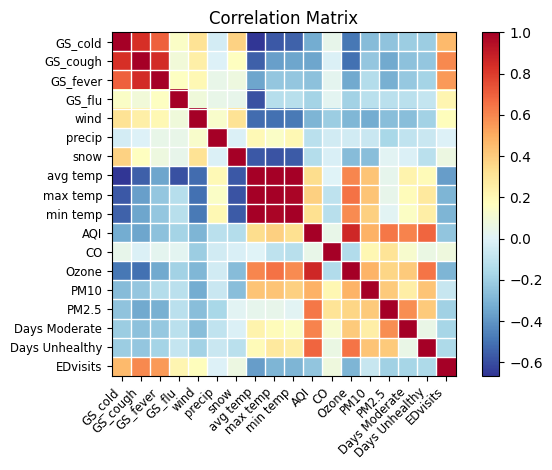

In [300]:
sm.graphics.plot_corr(corr_matrix, xnames=corr_matrix.columns).show()